In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import random
from scipy.stats import norm

In [ ]:
N = 100

2.1.1. Процесс Орнштейна-Уленбека

 Use the stochastic integral \\((N = 100)\\) to simulate and plot a path of 

(a) the Ornstein-Uhlenbeck process \\(dXt = −θXt+σdWt\\) with \\(X(0) = 10\\),
\\(θ = 5\\), and \\(σ = 3.5\\),



/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


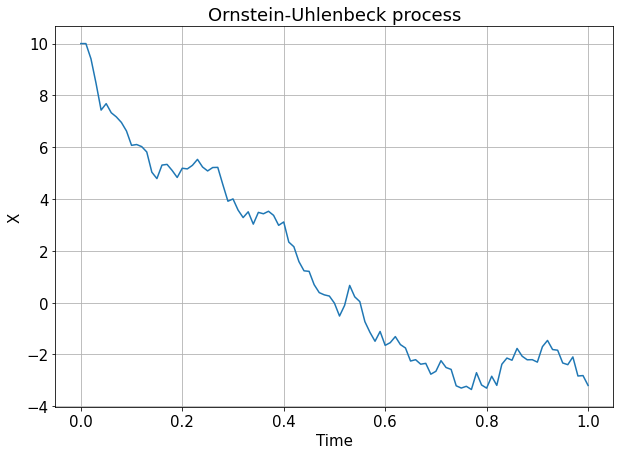

In [ ]:
def BM():
  W = []
  N = 100
  T = 1
  W.append(0)
  Delta = T / N
  X = [i/N for i in range (N+1)]
  for i in range(1, len(X)):
    W.append(W[i - 1] + np.random.normal (0, 1, 1) * np.sqrt(Delta))
  return W

N = 100
x = 10
theta = 5
sigma = 3.5

W = BM()
t =[i/N for i in range(N+1)]

ito_sum = [np.exp(-theta * (t[i] - t[i-1])) * (W[i] - W[i-1]) for i in range(1,N)]
X = [x * np.exp(-theta * t[i]) + sigma * sum(ito_sum[0:i]) for i in range(N)]
X = [x] + X
plt.figure ( figsize =(10, 7) )
plt.grid()
plt.plot(t , X)
plt.title('Ornstein-Uhlenbeck process')
plt.xlabel("Time")
plt.ylabel("X")
plt.show()

2.1.2. Процесс Cox-Ingersoll-Ross

(b) the Cox-Ingersoll-Ross process, \\(θ = (2.00, 0.20, 0.15)\\),


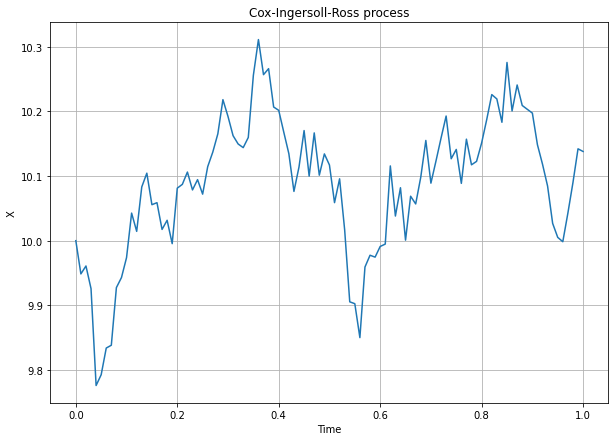

In [ ]:
theta = [2, 0.2, 0.15]

def BM():
  W = []
  N = 100
  T = 1
  W.append(0)
  Delta = T / N
  X = [i/N for i in range (N+1)]
  for i in range(1, len(X)):
    W.append(W[i - 1] + np.random.normal (0, 1, 1) * np.sqrt(Delta))
  return W

def Euler():
  X = []
  X.append(x)
  for i in range(1, N+1):
    X.append(X[i-1] +  (theta[0] - theta[1]*X[i-1]) * (t[i] - t[i-1]) + theta[2] * np.sqrt(X[i-1]) * (W[i] - W[i-1]))
  return(X)
x = 10
W = BM()
t =[i/N for i in range(N+1)]

X = Euler()

plt.figure (figsize = (10, 7))
plt.grid()
plt.plot(t , X)
plt.title('Cox-Ingersoll-Ross process')
plt.xlabel("Time")
plt.ylabel("X")
plt.show()

<ipython-input-6-77451ee73019>:2: RuntimeWarning: invalid value encountered in sqrt
  DX = theta * (beta - X) * dt + sigma * np.sqrt(X) * np.random.normal(0, np.sqrt(dt))


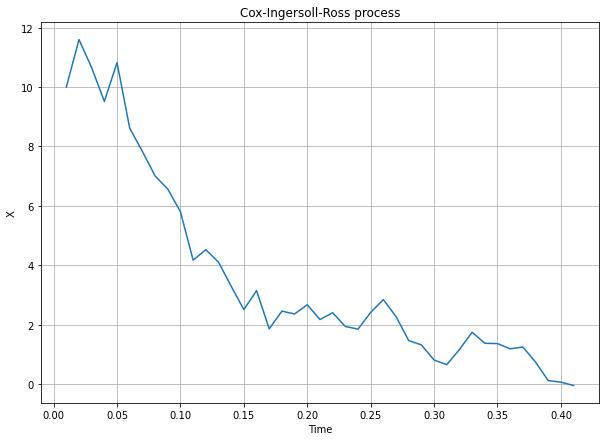

In [ ]:
def CIR2(X, theta, beta, sigma, dt):
  DX = theta * (beta - X) * dt + sigma * np.sqrt(X) * np.random.normal(0, np.sqrt(dt))
  return DX

N = 100
X = np.zeros(N)
X[0] = 10
theta = 5
sigma = 3.5
beta = 1.1
for i in range(1, len(X)):
  X[i] = X[i - 1] + CIR2(X[i - 1], theta, beta, sigma, 1 / N)

2.1.3 Процесс Блека-Шоулса-Мелтона

(c) the Black-Scholes-Merton process, \\(θ = (1.0, 0.2)\\).


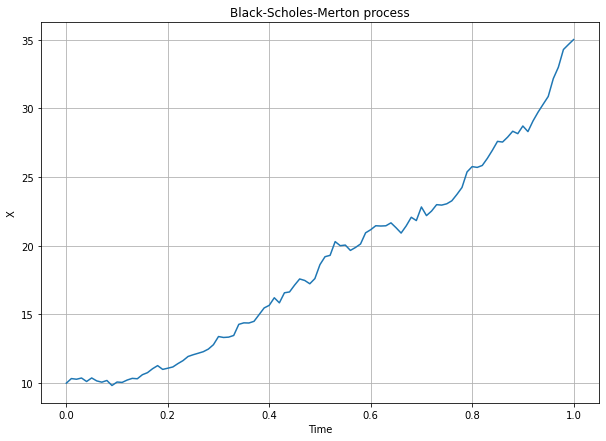

In [ ]:
theta = [1, 0.2]

def BM():
  W = []
  N = 100
  T = 1
  W.append(0)
  Delta = T / N
  X = [i/N for i in range (N+1)]
  for i in range(1, len(X)):
    W.append(W[i - 1] + np.random.normal (0, 1, 1) * np.sqrt(Delta))
  return W

x = 10
W = BM()

X = [x*np.exp((theta[0]-0.5*theta[1]**2)*t[i] + theta[1]*W[i]) for i in range(1, N+1)]
X = [x] + X

plt.figure(figsize = (10, 7))
plt.grid()
plt.plot(t, X)
plt.title('Black-Scholes-Merton process')
plt.xlabel("Time")
plt.ylabel("X")
plt.show()

2.2. Read the Section 2.5 and compute a confidence interval of the CIR
process from the previous item. Plot the path and a confidence interval.


In [ ]:
def param_k(alpha, sigma):
    return (4 * alpha) / (sigma ** 2)

def param_zeta(t, s, N, sigma, beta):
    return (sigma ** 2) * (1 - np.exp(-beta * (t / N - s / N))) / (4 * beta)

def param_lambda(t, s, N, x, sigma, beta):
    return 4 * beta * np.exp(-beta * (t / N - s / N)) * x / (sigma ** 2 * (1 - np.exp(-beta * (t / N - s / N))))

def param_xi(alpha_0):
    return norm.ppf(1 - alpha_0/2)

def v_lower(k, zeta, my_lambda, xi):
    return zeta * (k + my_lambda - xi * np.sqrt(2 * (k + 2 * my_lambda)))

def v_upper(k, zeta, my_lambda, xi):
    return zeta * (k + my_lambda + xi * np.sqrt(2 * (k + 2 * my_lambda)))

def BM():
  W = []
  N = 100
  T = 1
  W.append(0)
  Delta = T / N
  X = [i/N for i in range (N+1)]
  for i in range(1, len(X)):
    W.append(W[i - 1] + np.random.normal (0, 1, 1) * np.sqrt(Delta))
  return W

def Euler():
  X = []
  X.append(x)
  for i in range(1, N+1):
    X.append(X[i-1] +  (theta[0] - theta[1] * X[i-1]) * (t[i] - t[i-1]) + theta[2] * np.sqrt(X[i-1]) * (W[i] - W[i-1]))
  return(X)

x = 10
W = BM()
t =[i/N for i in range(N+1)]

In [ ]:
N = 100
X = np.zeros((100, N))
theta = [2, 0.2, 0.15]
for j in range(0, 100):
    W = BM()
    X_t = Euler()
    for i in range(0, N):
        X[j][i] = X_t[i]
V_LOWER = np.zeros(N)
V_UPPER = np.zeros(N)
V_LOWER[0] = X[0][0] = 10
V_UPPER[0] = X[0][0] = 10

k = param_k(theta[0], theta[2])
xi = param_xi(0.01)

for i in range(1, N):
    zeta = param_zeta(i, 0, N, theta[2], theta[1])
    p_lambda = param_lambda(i, 0, N, 10, theta[2], theta[1])
    V_LOWER[i] = v_lower(k, zeta, p_lambda, xi)
    V_UPPER[i] = v_upper(k, zeta, p_lambda, xi)

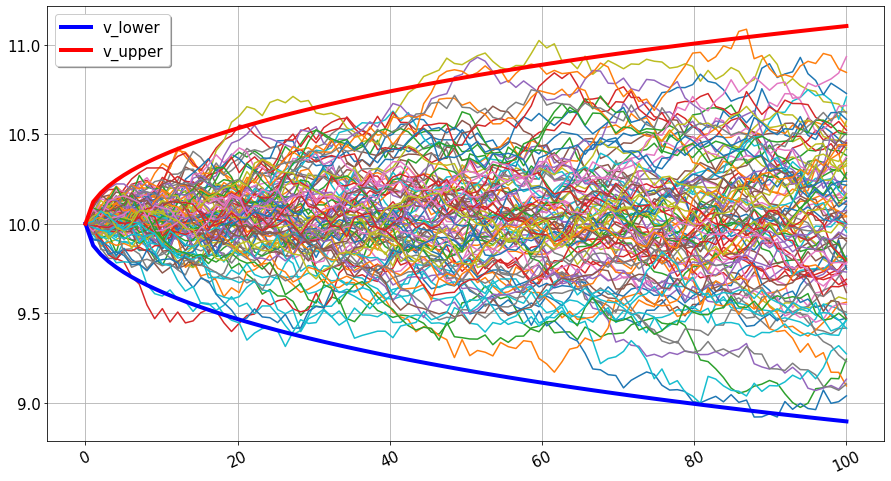

In [ ]:
fig, ax = plt.subplots()
for j in range(100):
    plt.plot(np.linspace(0, N, N), X[j])

plt.plot(np.linspace(0, N, N), V_LOWER, color = 'b', linewidth=4, label="v_lower")
plt.plot(np.linspace(0, N, N), V_UPPER, color = 'r', linewidth=4, label="v_upper")

ax.grid()   
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.xticks(rotation=25)

fig.set_figwidth(15)
fig.set_figheight(8)

plt.show()

2.3. For the Ornstein-Uhlenbeck process $$ dXt = θ(𝜇 − Xt)dt + σdWt, θ = 1, µ = 1.2, σ = 0.3 $$
generate three paths: \\(X_0 = 0.0, 2.0, N\Big(𝜇, \frac{σ^2}{2θ}\Big)\\)
and plot in graph. Define
a path with the stationary distribution from the graph.


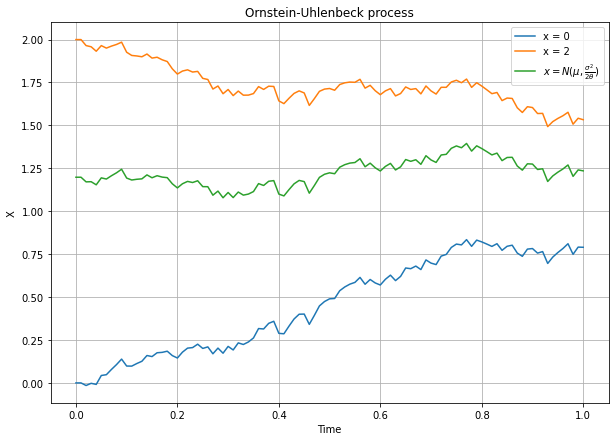

In [ ]:
def BM():
  W = []
  N = 100
  T = 1
  W.append(0)
  Delta = T / N
  X = [i/N for i in range (N+1)]
  for i in range(1, len(X)):
    W.append(W[i - 1] + np.random.normal (0, 1, 1) * np.sqrt(Delta))
  return W

N = 100
x = 10
theta = 1
sigma = 0.3
mu = 1.2

W = BM()
t =[i/N for i in range(N+1)]
X0 = [0, 2, np.random.normal (mu, (sigma ** 2)/(2*theta), 1)]
plt.figure(figsize = (10, 7))
plt.grid()
for x in X0:
  X = [x]
  ito_sum = [np.exp(-theta * (t[i] - t[i-1])) * (W[i] - W[i-1]) for i in range(1,N)]
  X_i = [mu + (X[0] - mu) * np.exp(-theta * t[i]) + sigma * sum(ito_sum[0:i]) for i in range(N)]
  X += X_i
  plt.plot(t , X)
plt.title('Ornstein-Uhlenbeck process')
plt.xlabel("Time")
plt.ylabel("X")
plt.legend (['x = 0', 'x = 2', r'$x = N(\mu, \frac{\sigma ^2}{2\theta})$'], loc = 'best')
plt.show()

2.4. Design a process that stays in the interval \\([0, 1]\\) and mean-reverts around \\(\frac{1}{2}\\), generate and plot in graph.


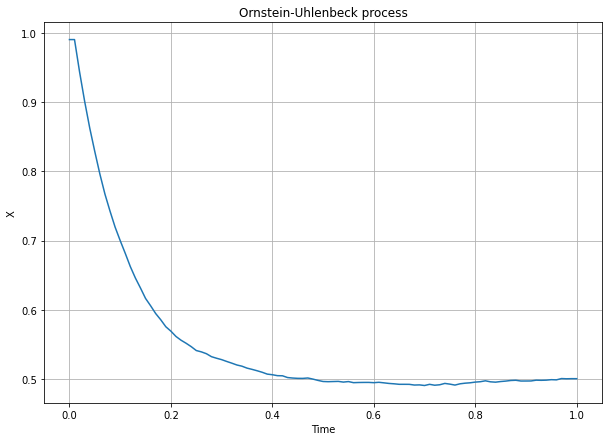

In [ ]:
def BM():
  W = []
  N = 100
  T = 1
  W.append(0)
  Delta = T / N
  X = [i/N for i in range (N+1)]
  for i in range(1, len(X)):
    W.append(W[i - 1] + np.random.normal (0, 1, 1) * np.sqrt(Delta))
  return W

N = 100
x = 0.99
theta = 10
sigma = 0.01
mu = 0.5

W = BM()
t =[i/N for i in range(N+1)]
plt.figure(figsize = (10, 7))
plt.grid()
X = [x]
ito_sum = [np.exp(-theta * (t[i] - t[i-1])) * (W[i] - W[i-1]) for i in range(1,N)]
X_i = [mu + (X[0] - mu) * np.exp(-theta * t[i]) + sigma * sum(ito_sum[0:i]) for i in range(N)]
X += X_i
plt.plot(t , X)
plt.title('Ornstein-Uhlenbeck process')
plt.xlabel("Time")
plt.ylabel("X")
plt.show()

2.5

Ornstein – Uhlenbeck process is a mean-reverting process, which is described by the SDE $$ dX_t = α(μ-X_t)dt+σdW_t$$
where \\(α > 0\\) and \\(W_t\\) is the Wiener process. It can easily be solved explicitly: $$X_t = e^{-αt}X_0+μ(1-e^{-αt})+∫_{0}^{t}σe^{α(s-t)}dW_s $$ 
So we deduce that $$ EX_t = e^{-αt}X_0 + μ(1-e^{-αt}) = \mu +σ(1), t \ → ∞ $$

$$ X_t =\frac{σ^2}{2α}\Big(1-e^{-2αt}\Big) = \frac{σ^2}{2α}, t \ → ∞$$

The coefficient \\(α\\) is called the speed of mean reversion.
Half-life of the mean-reversion, \\(t_{1/2}\\), is the average time it will take the process to get pulled half-way back to the mean. To this end, we consider the ODE $$ dx = α (μ − x), $$
which has the solution $$ x(t) = μ+e−αt(x_0−μ).$$
So we can find the half-time from the equation
$$x(t_{1/2}) −μ = \frac{x_0 - μ}{2}, $$
i. e. \\(t_{1/2} =\frac{log2}{α}\\).
In particular, the higher the mean-reversion speed is, the smaller is the half-life.

t =  0.06931471805599453


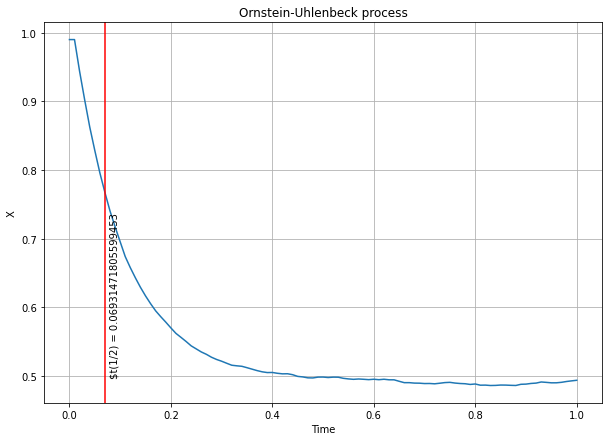

In [ ]:
def BM():
  W = []
  N = 100
  T = 1
  W.append(0)
  Delta = T / N
  X = [i/N for i in range (N+1)]
  for i in range(1, len(X)):
    W.append(W[i - 1] + np.random.normal (0, 1, 1) * np.sqrt(Delta))
  return W

N = 100
x = 0.99
theta = 10
sigma = 0.01
mu = 0.5

W = BM()
t =[i/N for i in range(N+1)]
plt.figure(figsize = (10, 7))
plt.grid()
X = [x]
ito_sum = [np.exp(-theta * (t[i] - t[i-1])) * (W[i] - W[i-1]) for i in range(1,N)]
X_i = [mu + (X[0] - mu) * np.exp(-theta * t[i]) + sigma * sum(ito_sum[0:i]) for i in range(N)]
X += X_i
t_05 = np.log(2)/theta
print("t = ", t_05)
plt.plot(t , X)
plt.axvline(x= t_05, color='r')
plt.text(t_05 + 0.01, 0.5,'$t(1/2) = ' + str(t_05),rotation=90)
plt.title('Ornstein-Uhlenbeck process')
plt.xlabel("Time")
plt.ylabel("X")
plt.show()

